In [28]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D,Flatten
from keras.layers import MaxPool2D
import numpy
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [29]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [30]:
# IMPORTING DATASETS
batch_size = 32
image_size = 180
seed = 42

train=tf.keras.utils.image_dataset_from_directory("./input/train",
                                                  batch_size=batch_size,
                                                  image_size=(image_size, image_size),
                                                  seed=seed)
test=tf.keras.utils.image_dataset_from_directory("./input/test",
                                                 batch_size=batch_size,
                                                 image_size=(image_size, image_size),
                                                 seed=seed)
val=tf.keras.utils.image_dataset_from_directory("./input/valid",
                                                batch_size=batch_size,
                                                image_size=(image_size, image_size),
                                                seed=seed)
class_Names=train.class_names
print(class_Names)
for class_name in class_Names:
    print(class_name)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'thre

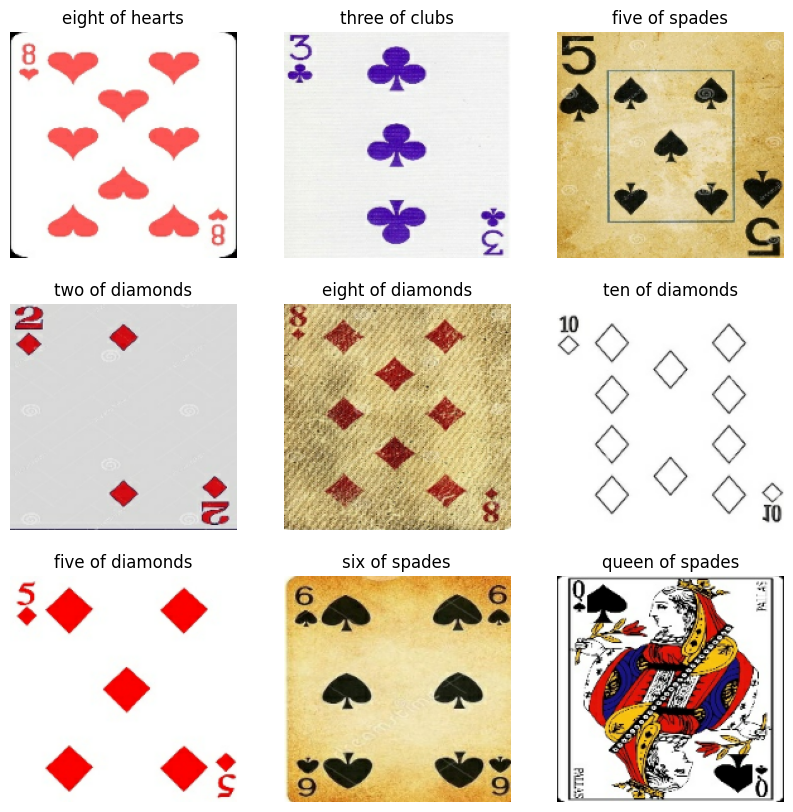

(32, 180, 180, 3)
(32,)


In [31]:
# HAVING A LOOK AT THE IMAGES OF TEST DATA
plt.figure(figsize=(10,10))
for images, labels in test.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_Names[labels[i]])
        plt.axis("off")
plt.show()
for image_batch, labels_batch in train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [32]:
# FAST PROCESSING
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)
num_classes=len(class_Names)

In [33]:
# BUILDING THE CNN,ANN MODEL
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [34]:
from keras.optimizers import SGD, RMSprop

#optimizer = SGD(learning_rate=0.01)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
#optimizer = RMSprop(learning_rate=0.001)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

metrics = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 45, 45, 64)       

In [35]:
# --
epochs = 20
history = model.fit(train, validation_data=val, epochs=epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/20


2023-11-10 13:56:19.367728: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


239/239 [==============================] - 8s 22ms/step - loss: 3.3740 - accuracy: 0.1201 - val_loss: 2.4853 - val_accuracy: 0.2604
Epoch 2/20
239/239 [==============================] - 5s 21ms/step - loss: 2.2039 - accuracy: 0.3796 - val_loss: 1.3562 - val_accuracy: 0.5509
Epoch 3/20
239/239 [==============================] - 5s 21ms/step - loss: 1.4938 - accuracy: 0.5762 - val_loss: 0.9886 - val_accuracy: 0.7019
Epoch 4/20
239/239 [==============================] - 5s 21ms/step - loss: 1.0934 - accuracy: 0.6949 - val_loss: 0.7819 - val_accuracy: 0.7887
Epoch 5/20
239/239 [==============================] - 5s 21ms/step - loss: 0.7958 - accuracy: 0.7758 - val_loss: 0.7249 - val_accuracy: 0.8151
Epoch 6/20
239/239 [==============================] - 5s 21ms/step - loss: 0.5747 - accuracy: 0.8353 - val_loss: 0.6940 - val_accuracy: 0.8000
Epoch 7/20
239/239 [==============================] - 5s 21ms/step - loss: 0.4264 - accuracy: 0.8724 - val_loss: 0.7561 - val_accuracy: 0.8302
Epoch 8/20

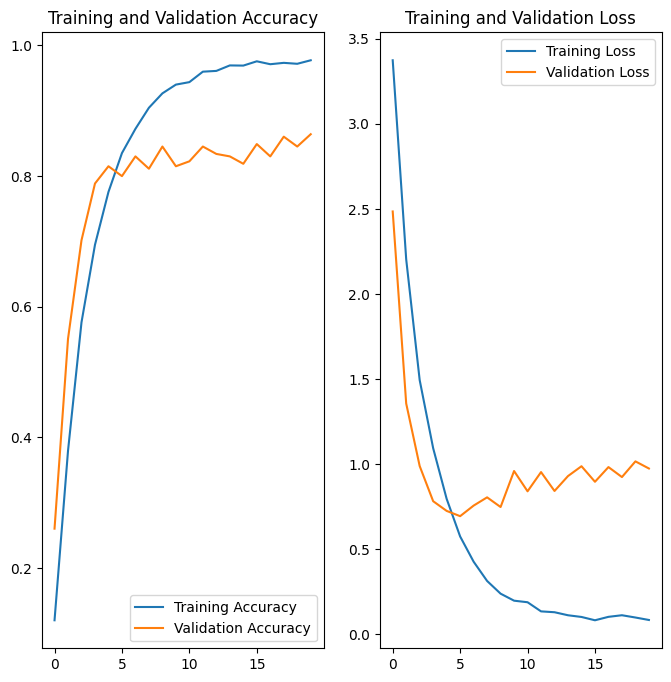

In [36]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()